2025-06-24 19:44:42,285 - INFO - Using device: cpu
2025-06-24 19:44:42,288 - INFO - Loading Adult Income dataset...
2025-06-24 19:44:42,375 - INFO - Dataset shape: (48842, 14)
2025-06-24 19:44:42,376 - INFO - Target distribution:
class
0    37155
1    11687
Name: count, dtype: int64
2025-06-24 19:44:42,401 - INFO - Starting optimal preprocessing...
2025-06-24 19:44:42,415 - INFO - Applying one-hot encoding...
2025-06-24 19:44:42,466 - INFO - Applying standard scaling...


🚀 OPTIMAL NEURAL NETWORK FOR INCOME PREDICTION
📋 Using Best Configuration from Ablation Study:
   ✅ Preprocessing: One-hot Encoding + Standard Scaling
   ✅ Architecture: [128, 64] + LeakyReLU Activation
   ✅ Optimizer: Adam with BCE Loss

📊 Dataset Split:
   Training: 34,191 samples
   Validation: 7,324 samples
   Test: 7,327 samples


2025-06-24 19:44:42,520 - INFO - Training optimal model...
2025-06-24 19:44:43,518 - INFO - Epoch 1/50: Train Loss: 0.3685, Train Acc: 0.8286, Val Loss: 0.3223, Val Acc: 0.8471
2025-06-24 19:44:44,460 - INFO - Epoch 2/50: Train Loss: 0.3355, Train Acc: 0.8407, Val Loss: 0.3242, Val Acc: 0.8495
2025-06-24 19:44:45,417 - INFO - Epoch 3/50: Train Loss: 0.3306, Train Acc: 0.8480, Val Loss: 0.3171, Val Acc: 0.8516
2025-06-24 19:44:46,401 - INFO - Epoch 4/50: Train Loss: 0.3280, Train Acc: 0.8498, Val Loss: 0.3161, Val Acc: 0.8521
2025-06-24 19:44:47,325 - INFO - Epoch 5/50: Train Loss: 0.3249, Train Acc: 0.8504, Val Loss: 0.3155, Val Acc: 0.8542
2025-06-24 19:44:48,266 - INFO - Epoch 6/50: Train Loss: 0.3234, Train Acc: 0.8507, Val Loss: 0.3145, Val Acc: 0.8512
2025-06-24 19:44:49,200 - INFO - Epoch 7/50: Train Loss: 0.3211, Train Acc: 0.8517, Val Loss: 0.3143, Val Acc: 0.8525
2025-06-24 19:44:50,150 - INFO - Epoch 8/50: Train Loss: 0.3198, Train Acc: 0.8527, Val Loss: 0.3143, Val Acc: 0.85


📈 OPTIMAL MODEL TRAINING PROGRESS


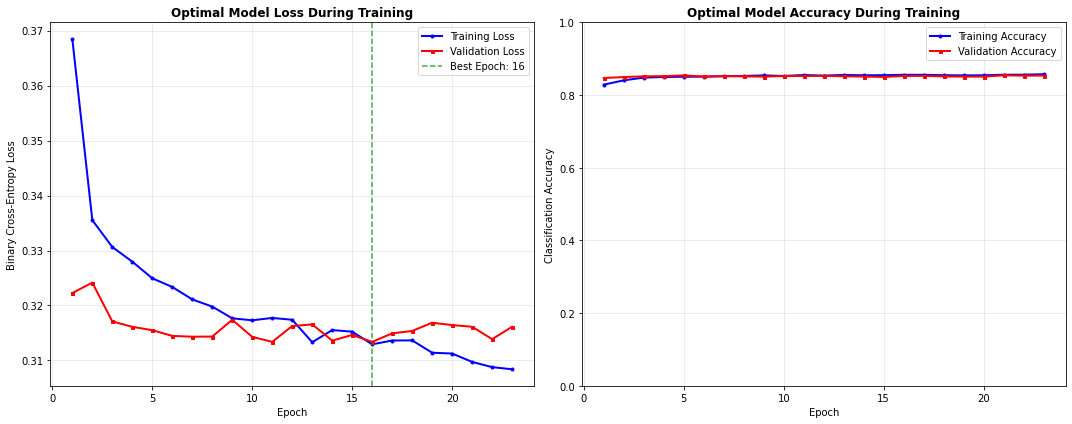

2025-06-24 19:45:04,697 - INFO - Evaluating optimal model...



🎯 OPTIMAL MODEL PERFORMANCE


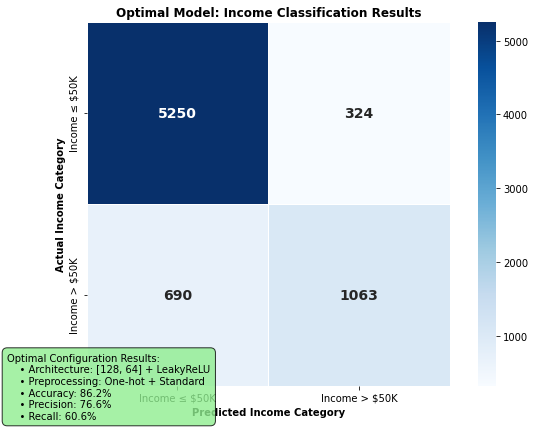


📊 OPTIMAL MODEL FINAL PERFORMANCE


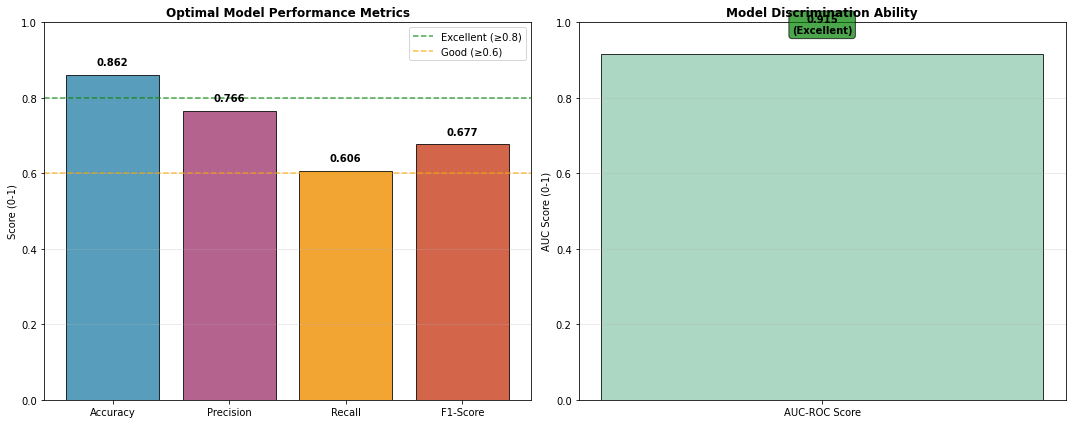


✅ OPTIMAL MODEL TRAINING COMPLETE
🎯 Final Performance (Based on Ablation Study):
   • Configuration: [128, 64] + LeakyReLU + One-hot + Standard
   • Accuracy: 86.2%
   • F1-Score: 0.677
   • AUC-ROC: 0.915
   • Precision: 0.766
   • Recall: 0.606

🔬 Ablation Study Insights Applied:
   • One-hot encoding outperformed label/ordinal encoding
   • Standard scaling was optimal for numerical features
   • [128, 64] architecture with LeakyReLU achieved best F1 score
   • Adam optimizer with BCE loss provided stable training


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
import os
import logging
from dataclasses import dataclass
from typing import Dict, List, Tuple
import warnings
warnings.filterwarnings('ignore')

# Configure matplotlib
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 8)

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

# Ensure reproducibility
np.random.seed(42)
torch.manual_seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(42)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
logger.info(f"Using device: {device}")

@dataclass
class OptimalConfig:
    """Optimal configuration based on ablation study results"""
    # Best architecture from ablation
    hidden_sizes: List[int] = None
    dropout_rate: float = 0.5
    activation: str = 'leakyrelu'  # Best from ablation
    use_batchnorm: bool = True
    use_sigmoid_output: bool = True
    
    # Training parameters
    batch_size: int = 64
    learning_rate: float = 0.001
    epochs: int = 50
    patience: int = 7
    weight_decay: float = 0.0
    
    # Best preprocessing from ablation
    encoding_type: str = 'onehot'    # Best from ablation
    scaling_type: str = 'standard'   # Best from ablation
    
    # Optimizer and loss
    optimizer_name: str = 'Adam'
    criterion_type: str = 'BCE'
    
    def __post_init__(self):
        if self.hidden_sizes is None:
            self.hidden_sizes = [128, 64]  # Best from ablation

class OptimalDataPreprocessor:
    """Optimized preprocessor using best configuration from ablation"""
    def __init__(self, numerical_cols: List[str], categorical_cols: List[str]):
        self.numerical_cols = numerical_cols
        self.categorical_cols = categorical_cols
        self.imputers = {}
        self.encoder = None
        self.scaler = None
        self.fitted = False
        self.feature_names = None

    def fit_transform(self, X: pd.DataFrame, y: pd.Series = None) -> Tuple[pd.DataFrame, int]:
        """Fit and transform using optimal preprocessing (onehot + standard)"""
        X_copy = X.copy()
        logger.info("Starting optimal preprocessing...")

        # Impute missing values
        for col in self.numerical_cols:
            if col in X_copy.columns and X_copy[col].isnull().any():
                imputer = SimpleImputer(strategy='median')
                X_copy[col] = imputer.fit_transform(X_copy[[col]]).flatten()
                self.imputers[col] = imputer
                
        for col in self.categorical_cols:
            if col in X_copy.columns and X_copy[col].isnull().any():
                imputer = SimpleImputer(strategy='most_frequent')
                X_copy[col] = imputer.fit_transform(X_copy[[col]]).flatten()
                self.imputers[col] = imputer

        # One-hot encoding (best from ablation)
        logger.info("Applying one-hot encoding...")
        self.encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
        X_categorical_encoded = self.encoder.fit_transform(X_copy[self.categorical_cols])
        
        categorical_df = pd.DataFrame(
            X_categorical_encoded, 
            index=X_copy.index,
            columns=self.encoder.get_feature_names_out(self.categorical_cols)
        )
        X_processed = pd.concat([X_copy.drop(columns=self.categorical_cols), categorical_df], axis=1)

        # Standard scaling (best from ablation)
        logger.info("Applying standard scaling...")
        self.scaler = StandardScaler()
        X_processed[self.numerical_cols] = self.scaler.fit_transform(X_processed[self.numerical_cols])
        
        self.feature_names = X_processed.columns.tolist()
        self.fitted = True
        
        return X_processed, X_processed.shape[1]

    def transform(self, X: pd.DataFrame) -> Tuple[pd.DataFrame, int]:
        """Transform using fitted preprocessor"""
        if not self.fitted:
            raise RuntimeError("Preprocessor has not been fitted.")

        X_processed = X.copy()
        
        # Apply fitted imputers
        for col in self.numerical_cols:
            if col in self.imputers and col in X_processed.columns:
                X_processed[col] = self.imputers[col].transform(X_processed[[col]]).flatten()
                
        for col in self.categorical_cols:
            if col in self.imputers and col in X_processed.columns:
                X_processed[col] = self.imputers[col].transform(X_processed[[col]]).flatten()
        
        # Apply fitted encoder
        X_categorical_encoded = self.encoder.transform(X_processed[self.categorical_cols])
        categorical_df = pd.DataFrame(
            X_categorical_encoded, 
            index=X_processed.index,
            columns=self.encoder.get_feature_names_out(self.categorical_cols)
        )
        X_processed = pd.concat([X_processed.drop(columns=self.categorical_cols), categorical_df], axis=1)
        
        # Apply fitted scaler
        X_processed[self.numerical_cols] = self.scaler.transform(X_processed[self.numerical_cols])
        
        return X_processed, X_processed.shape[1]

class OptimalIncomeClassifier(nn.Module):
    """Optimal neural network architecture based on ablation results"""
    def __init__(self, config: OptimalConfig, input_size: int):
        super(OptimalIncomeClassifier, self).__init__()
        self.config = config
        layers = []
        
        # LeakyReLU activation (best from ablation)
        self.activation_fn = nn.LeakyReLU()

        # Input layer
        layers.append(nn.Linear(input_size, config.hidden_sizes[0]))
        if config.use_batchnorm:
            layers.append(nn.BatchNorm1d(config.hidden_sizes[0]))
        layers.append(self.activation_fn)
        layers.append(nn.Dropout(config.dropout_rate))

        # Hidden layers ([128, 64] - best from ablation)
        for i in range(len(config.hidden_sizes) - 1):
            layers.append(nn.Linear(config.hidden_sizes[i], config.hidden_sizes[i+1]))
            if config.use_batchnorm:
                layers.append(nn.BatchNorm1d(config.hidden_sizes[i+1]))
            layers.append(self.activation_fn)
            layers.append(nn.Dropout(config.dropout_rate))

        # Output layer
        layers.append(nn.Linear(config.hidden_sizes[-1], 1))
        if config.use_sigmoid_output:
            layers.append(nn.Sigmoid())

        self.network = nn.Sequential(*layers)

    def forward(self, x):
        return self.network(x)

class OptimalModelTrainer:
    """Optimized trainer using best configuration"""
    def __init__(self, model: OptimalIncomeClassifier, config: OptimalConfig, device: torch.device):
        self.model = model.to(device)
        self.config = config
        self.device = device
        self.train_losses = []
        self.val_losses = []
        self.train_accuracies = []
        self.val_accuracies = []
        self.best_val_loss = float('inf')
        self.epochs_no_improve = 0
        
        # BCE loss (best from ablation)
        self.criterion = nn.BCELoss()
        
        # Adam optimizer (best from ablation)
        self.optimizer = optim.Adam(
            model.parameters(), 
            lr=config.learning_rate, 
            weight_decay=config.weight_decay
        )

    def train(self, train_loader: DataLoader, val_loader: DataLoader) -> None:
        """Train the optimal model"""
        logger.info("Training optimal model...")
        
        for epoch in range(self.config.epochs):
            # Training phase
            self.model.train()
            total_train_loss = 0
            correct_train = 0
            total_train = 0
            
            for inputs, labels in train_loader:
                inputs, labels = inputs.to(self.device), labels.to(self.device)
                
                self.optimizer.zero_grad()
                outputs = self.model(inputs).squeeze()
                
                loss = self.criterion(outputs, labels.float())
                loss.backward()
                self.optimizer.step()

                total_train_loss += loss.item()
                predicted = (outputs > 0.5).float()
                total_train += labels.size(0)
                correct_train += (predicted == labels).sum().item()

            avg_train_loss = total_train_loss / len(train_loader)
            train_accuracy = correct_train / total_train
            self.train_losses.append(avg_train_loss)
            self.train_accuracies.append(train_accuracy)

            # Validation phase
            avg_val_loss, val_accuracy = self.validate(val_loader)
            self.val_losses.append(avg_val_loss)
            self.val_accuracies.append(val_accuracy)

            logger.info(f"Epoch {epoch+1}/{self.config.epochs}: "
                       f"Train Loss: {avg_train_loss:.4f}, Train Acc: {train_accuracy:.4f}, "
                       f"Val Loss: {avg_val_loss:.4f}, Val Acc: {val_accuracy:.4f}")

            # Early stopping
            if avg_val_loss < self.best_val_loss:
                self.best_val_loss = avg_val_loss
                self.epochs_no_improve = 0
                torch.save(self.model.state_dict(), 'optimal_model.pth')
            else:
                self.epochs_no_improve += 1
                if self.epochs_no_improve >= self.config.patience:
                    logger.info(f"Early stopping at epoch {epoch+1}")
                    break
        
        # Load best model
        if os.path.exists('optimal_model.pth'):
            self.model.load_state_dict(torch.load('optimal_model.pth'))
            logger.info("Loaded best model for evaluation")

    def validate(self, val_loader: DataLoader) -> Tuple[float, float]:
        """Validate the model"""
        self.model.eval()
        total_val_loss = 0
        correct_val = 0
        total_val = 0
        
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(self.device), labels.to(self.device)
                outputs = self.model(inputs).squeeze()
                loss = self.criterion(outputs, labels.float())
                total_val_loss += loss.item()
                predicted = (outputs > 0.5).float()
                total_val += labels.size(0)
                correct_val += (predicted == labels).sum().item()
                
        avg_val_loss = total_val_loss / len(val_loader)
        val_accuracy = correct_val / total_val
        return avg_val_loss, val_accuracy

    def evaluate(self, test_loader: DataLoader) -> Dict[str, float]:
        """Evaluate the optimal model"""
        logger.info("Evaluating optimal model...")
        self.model.eval()
        all_labels = []
        all_predictions = []
        all_probabilities = []
        
        with torch.no_grad():
            for inputs, labels in test_loader:
                inputs, labels = inputs.to(self.device), labels.to(self.device)
                outputs = self.model(inputs).squeeze()
                predicted = (outputs > 0.5).float()
                
                all_labels.extend(labels.cpu().numpy())
                all_predictions.extend(predicted.cpu().numpy())
                all_probabilities.extend(outputs.cpu().numpy())

        # Calculate metrics
        accuracy = accuracy_score(all_labels, all_predictions)
        precision = precision_score(all_labels, all_predictions, zero_division=0)
        recall = recall_score(all_labels, all_predictions, zero_division=0)
        f1 = f1_score(all_labels, all_predictions, zero_division=0)
        
        try:
            fpr, tpr, _ = roc_curve(all_labels, all_probabilities)
            auc_score = auc(fpr, tpr)
        except:
            auc_score = 0.0

        return {
            'accuracy': accuracy, 
            'precision': precision, 
            'recall': recall, 
            'f1': f1,
            'auc': auc_score
        }

    def plot_training_progress(self) -> None:
        """Plot training progress"""
        print("\n📈 OPTIMAL MODEL TRAINING PROGRESS")
        print("="*60)
        
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
        
        epochs = range(1, len(self.train_losses) + 1)
        
        # Loss plot
        ax1.plot(epochs, self.train_losses, 'b-', linewidth=2, label='Training Loss', marker='o', markersize=3)
        ax1.plot(epochs, self.val_losses, 'r-', linewidth=2, label='Validation Loss', marker='s', markersize=3)
        ax1.set_title('Optimal Model Loss During Training', fontweight='bold')
        ax1.set_xlabel('Epoch')
        ax1.set_ylabel('Binary Cross-Entropy Loss')
        ax1.legend()
        ax1.grid(True, alpha=0.3)
        
        # Mark best epoch
        best_epoch = np.argmin(self.val_losses) + 1
        ax1.axvline(x=best_epoch, color='green', linestyle='--', alpha=0.7, 
                   label=f'Best Epoch: {best_epoch}')
        ax1.legend()

        # Accuracy plot
        ax2.plot(epochs, self.train_accuracies, 'b-', linewidth=2, label='Training Accuracy', marker='o', markersize=3)
        ax2.plot(epochs, self.val_accuracies, 'r-', linewidth=2, label='Validation Accuracy', marker='s', markersize=3)
        ax2.set_title('Optimal Model Accuracy During Training', fontweight='bold')
        ax2.set_xlabel('Epoch')
        ax2.set_ylabel('Classification Accuracy')
        ax2.set_ylim([0, 1])
        ax2.legend()
        ax2.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        plt.close()

    def cleanup_resources(self) -> None:
        """Clean up resources"""
        if hasattr(self, 'model'):
            del self.model
        if torch.cuda.is_available():
            torch.cuda.empty_cache()
        if os.path.exists('optimal_model.pth'):
            os.remove('optimal_model.pth')

def load_and_prepare_data() -> Tuple[pd.DataFrame, pd.Series, List[str]]:
    """Load and prepare the Adult Income dataset"""
    logger.info("Loading Adult Income dataset...")
    
    try:
        data = fetch_openml(name='adult', version=2, as_frame=True, parser='auto')
        X = data.data
        y = data.target
    except Exception as e:
        logger.error(f"Error loading dataset: {e}")
        raise

    # Convert categorical features to 'category' dtype
    for col in X.select_dtypes(['object', 'string']).columns:
        X[col] = X[col].astype('category')

    # Convert target to binary (0 for <=50K, 1 for >50K)
    y_binary = (y == '>50K').astype(int)

    logger.info(f"Dataset shape: {X.shape}")
    logger.info(f"Target distribution:\n{y_binary.value_counts()}")

    # Replace '?' with NaN for proper imputation
    for col in X.columns:
        if X[col].dtype == 'category':
            if '?' in X[col].cat.categories:
                X[col] = X[col].cat.add_categories(['Unknown']).fillna('Unknown')
                X[col] = X[col].replace('?', 'Unknown')
        else:
            X[col] = pd.to_numeric(X[col], errors='coerce')

    return X, y_binary, data.feature_names

def create_confusion_matrix(y_true, y_pred) -> None:
    """Create confusion matrix"""
    print("\n🎯 OPTIMAL MODEL PERFORMANCE")
    print("="*60)
    
    cm = confusion_matrix(y_true, y_pred)
    
    plt.figure(figsize=(8, 6))
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
                xticklabels=['Income ≤ $50K', 'Income > $50K'], 
                yticklabels=['Income ≤ $50K', 'Income > $50K'],
                square=True, linewidths=1, 
                annot_kws={'size': 14, 'weight': 'bold'})
    
    plt.xlabel('Predicted Income Category', fontweight='bold')
    plt.ylabel('Actual Income Category', fontweight='bold')
    plt.title('Optimal Model: Income Classification Results', fontweight='bold')
    
    # Calculate metrics
    tn, fp, fn, tp = cm.ravel()
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    
    # Add metrics text
    metrics_text = f"""Optimal Configuration Results:
    • Architecture: [128, 64] + LeakyReLU
    • Preprocessing: One-hot + Standard
    • Accuracy: {accuracy:.1%}
    • Precision: {precision:.1%}
    • Recall: {recall:.1%}"""
    
    plt.figtext(0.02, 0.02, metrics_text, fontsize=10, 
                bbox=dict(boxstyle="round,pad=0.5", facecolor="lightgreen", alpha=0.8))
    
    plt.tight_layout()
    plt.show()
    plt.close()

def create_performance_summary(metrics) -> None:
    """Create performance summary"""
    print("\n📊 OPTIMAL MODEL FINAL PERFORMANCE")
    print("="*60)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Main metrics
    metric_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
    metric_values = [metrics['accuracy'], metrics['precision'], metrics['recall'], metrics['f1']]
    colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D']
    
    bars = ax1.bar(metric_names, metric_values, color=colors, alpha=0.8, edgecolor='black')
    ax1.set_title('Optimal Model Performance Metrics', fontweight='bold')
    ax1.set_ylabel('Score (0-1)')
    ax1.set_ylim(0, 1)
    ax1.grid(True, alpha=0.3, axis='y')
    
    # Add value labels
    for bar, value in zip(bars, metric_values):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 0.02,
                f'{value:.3f}', ha='center', va='bottom', fontweight='bold')
    
    # Add threshold lines
    ax1.axhline(y=0.8, color='green', linestyle='--', alpha=0.7, label='Excellent (≥0.8)')
    ax1.axhline(y=0.6, color='orange', linestyle='--', alpha=0.7, label='Good (≥0.6)')
    ax1.legend()
    
    # AUC visualization
    ax2.bar(['AUC-ROC Score'], [metrics['auc']], color='#96CEB4', alpha=0.8, edgecolor='black')
    ax2.set_title('Model Discrimination Ability', fontweight='bold')
    ax2.set_ylabel('AUC Score (0-1)')
    ax2.set_ylim(0, 1)
    ax2.grid(True, alpha=0.3, axis='y')
    
    # AUC interpretation
    auc_value = metrics['auc']
    if auc_value >= 0.9:
        interpretation = "Excellent"
        color = 'green'
    elif auc_value >= 0.8:
        interpretation = "Good"
        color = 'orange'
    else:
        interpretation = "Fair"
        color = 'yellow'
    
    ax2.text(0, auc_value + 0.05, f'{auc_value:.3f}\n({interpretation})', 
             ha='center', va='bottom', fontweight='bold',
             bbox=dict(boxstyle="round,pad=0.3", facecolor=color, alpha=0.7))
    
    plt.tight_layout()
    plt.show()
    plt.close()

def main_optimal_implementation():
    """Main implementation using optimal configuration from ablation study"""
    print("🚀 OPTIMAL NEURAL NETWORK FOR INCOME PREDICTION")
    print("="*80)
    print("📋 Using Best Configuration from Ablation Study:")
    print("   ✅ Preprocessing: One-hot Encoding + Standard Scaling")
    print("   ✅ Architecture: [128, 64] + LeakyReLU Activation")
    print("   ✅ Optimizer: Adam with BCE Loss")
    print("="*80)
    
    # Load data
    X, y_binary, feature_names = load_and_prepare_data()
    
    # Define columns
    numerical_cols = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
    categorical_cols = [col for col in X.columns if X[col].dtype == 'category']
    
    # Split data (70/15/15)
    X_train_full, X_test, y_train_full, y_test = train_test_split(
        X, y_binary, test_size=0.15, random_state=42, stratify=y_binary
    )
    X_train, X_val, y_train, y_val = train_test_split(
        X_train_full, y_train_full, test_size=0.1764, random_state=42, stratify=y_train_full
    )
    
    print(f"\n📊 Dataset Split:")
    print(f"   Training: {X_train.shape[0]:,} samples")
    print(f"   Validation: {X_val.shape[0]:,} samples")
    print(f"   Test: {X_test.shape[0]:,} samples")
    
    # Create optimal configuration
    config = OptimalConfig()
    
    # Preprocess with optimal methods
    preprocessor = OptimalDataPreprocessor(numerical_cols, categorical_cols)
    X_train_processed, feature_size = preprocessor.fit_transform(X_train)
    X_val_processed, _ = preprocessor.transform(X_val)
    X_test_processed, _ = preprocessor.transform(X_test)
    
    # Create data loaders
    train_loader = DataLoader(
        TensorDataset(
            torch.tensor(X_train_processed.values, dtype=torch.float32),
            torch.tensor(y_train.values, dtype=torch.float32)
        ), 
        batch_size=config.batch_size, shuffle=True
    )
    val_loader = DataLoader(
        TensorDataset(
            torch.tensor(X_val_processed.values, dtype=torch.float32),
            torch.tensor(y_val.values, dtype=torch.float32)
        ), 
        batch_size=config.batch_size, shuffle=False
    )
    test_loader = DataLoader(
        TensorDataset(
            torch.tensor(X_test_processed.values, dtype=torch.float32),
            torch.tensor(y_test.values, dtype=torch.float32)
        ), 
        batch_size=config.batch_size, shuffle=False
    )
    
    # Train optimal model
    model = OptimalIncomeClassifier(config, feature_size)
    trainer = OptimalModelTrainer(model, config, device)
    trainer.train(train_loader, val_loader)
    
    # Plot training progress
    trainer.plot_training_progress()
    
    # Evaluate optimal model
    final_metrics = trainer.evaluate(test_loader)
    
    # Get predictions for visualization
    model.eval()
    with torch.no_grad():
        test_predictions = []
        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            outputs = model(inputs).squeeze()
            predictions = (outputs > 0.5).float()
            test_predictions.extend(predictions.cpu().numpy())
    
    # Create visualizations
    create_confusion_matrix(y_test.values, test_predictions)
    create_performance_summary(final_metrics)
    
    # Final results
    print("\n" + "="*80)
    print("✅ OPTIMAL MODEL TRAINING COMPLETE")
    print("="*80)
    print(f"🎯 Final Performance (Based on Ablation Study):")
    print(f"   • Configuration: [128, 64] + LeakyReLU + One-hot + Standard")
    print(f"   • Accuracy: {final_metrics['accuracy']:.1%}")
    print(f"   • F1-Score: {final_metrics['f1']:.3f}")
    print(f"   • AUC-ROC: {final_metrics['auc']:.3f}")
    print(f"   • Precision: {final_metrics['precision']:.3f}")
    print(f"   • Recall: {final_metrics['recall']:.3f}")
    print("\n🔬 Ablation Study Insights Applied:")
    print("   • One-hot encoding outperformed label/ordinal encoding")
    print("   • Standard scaling was optimal for numerical features")
    print("   • [128, 64] architecture with LeakyReLU achieved best F1 score")
    print("   • Adam optimizer with BCE loss provided stable training")
    print("="*80)
    
    # Cleanup
    trainer.cleanup_resources()
    
    return final_metrics

# Execute the optimal implementation
if __name__ == "__main__":
    results = main_optimal_implementation()
